<a href="https://colab.research.google.com/github/tsato-code/colab_notebooks/blob/main/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import numpy as np
import pandas as pd
from scipy.spatial.distance import correlation
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard

In [3]:
u = np.array([1, 2, 3])
v = np.array([-1, -2, -3])

-1.0

In [9]:
print(1 - correlation(u, v))  # ピアソンの相関係数による類以度
print(1 - cosine(u, v))  # cosine類以度
print(1 - jaccard(u, v))  # Jaccard係数による類以度

-1.0
-1.0
0.0


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
%cd /content/drive/MyDrive/works/colab_notebooks/

/content/drive/MyDrive/works/colab_notebooks


In [23]:
!wget http://files.grouplens.org/papers/ml-100k.zip
!unzip ml-100k.zip

--2021-01-19 14:17:13--  http://files.grouplens.org/papers/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  12.2MB/s    in 0.4s    

2021-01-19 14:17:14 (12.2 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  

In [28]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/works/colab_notebooks/ml-100k'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/works/colab_notebooks/ml-100k/allbut.pl
/content/drive/MyDrive/works/colab_notebooks/ml-100k/mku.sh
/content/drive/MyDrive/works/colab_notebooks/ml-100k/README
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.data
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.genre
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.info
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.item
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.occupation
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u.user
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u1.base
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u1.test
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u2.base
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u2.test
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u3.base
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u3.test
/content/drive/MyDrive/works/colab_notebooks/ml-100k/u4.base
/content/drive/MyDrive/

In [30]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [31]:
print(users.shape)

(943, 5)


In [33]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'], unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [35]:
ratings.shape

(100000, 5)

In [38]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5) ,encoding='latin1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [39]:
movies.shape

(1682, 5)

In [41]:
# 最も評価された作品トップ10
movie_rating = pd.merge(movies, ratings)
lens = pd.merge(movie_rating, users)
lens.title.value_counts()[:10]

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [55]:
# 評価値が高い作品トップ10
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [62]:
# ノイズを除去（評価件数100件以上のもの）
atleast100 = movie_stats[('rating', 'size')] >= 100
movie_stats[atleast100].sort_values(by=[('rating', 'mean')], ascending=False).head(10)

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

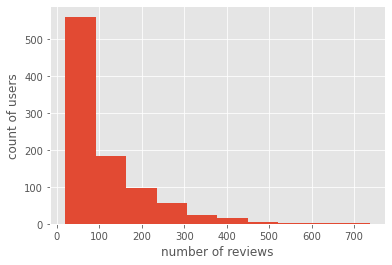

In [72]:
# ヒストグラム（ユーザーがいくつの映画をレビューしたか）
from matplotlib import pyplot as plt
plt.style.use('ggplot')
lens.groupby('user_id').size().sort_values(ascending=False).hist()
plt.xlabel('number of reviews')
plt.ylabel('count of users')
plt.show()

In [74]:
# ユーザの評価数と評価値平均
user_stats = lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats['rating'].describe()

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


In [77]:
from sklearn.feature_extraction import DictVectorizer

train = [
    {'user':'1', 'item': '5', 'age': 19},
    {'user':'2', 'item': '43', 'age': 22},
    {'user':'3', 'item': '10', 'age': 55},
    {'user':'4', 'item': '10', 'age': 20},
]

v = DictVectorizer()
X = v.fit_transform(train)
print(X.toarray())

[[19.  0.  0.  1.  1.  0.  0.  0.]
 [22.  0.  1.  0.  0.  1.  0.  0.]
 [55.  1.  0.  0.  0.  0.  1.  0.]
 [20.  1.  0.  0.  0.  0.  0.  1.]]


In [80]:
!pip install fastFM

In [81]:
from fastFM import als

In [85]:
y = np.array([5.0, 1.0, 2.0, 4.0])
fm = als.FMRegression(n_iter=1000, init_stdev=00.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X, y)
fm.predict(v.transform({'user': '5', 'item': '10', 'age': 24}))

array([3.62713759])

In [87]:
def load_data(filename, path='ml-100k/'):
    data = []
    y = []
    with open(path+filename) as f:
        for line in f:
            (user, movieid, rating, ts) = line.split('\t')
            data.append({'user_id': str(user), 'movie_id': str(movieid)})
            y.append(float(rating))
    
    return (data, np.array(y))


(dev_data, y_dev) = load_data('ua.base')
(test_data, y_test) = load_data('ua.test')

In [90]:
from sklearn.model_selection import train_test_split

v = DictVectorizer()
X_dev = v.fit_transform(dev_data)
X_test = v.transform(test_data)
print(np.std(y_test))
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

1.120180145761465


In [102]:
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

n_iter = 300
step_size = 1
seed = 123
rank = 4

fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
fm.fit_predict(X_train, y_train, X_dev_test)

rmse_dev_test = []
rmse_test = []
hyper_param = np.zeros((n_iter-1, 3+2*rank), dtype=np.float64)

for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_dev_test)))
    hyper_param[nr, :] = fm.hyper_param_

values = np.arange(1, n_iter)
x = values * step_size
burn_in = 5
x = x[burn_in:]

[]

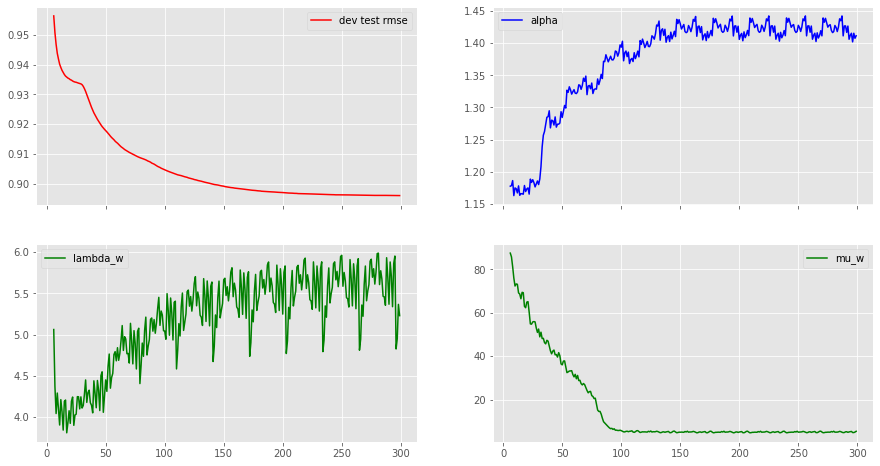

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))
axes[0, 0].plot(x, rmse_test[burn_in:], label='dev test rmse', color='r')
axes[0, 0].legend()
axes[0, 1].plot(x, hyper_param[burn_in:, 0], label='alpha', color='b')
axes[0, 1].legend()
axes[1, 0].plot(x, hyper_param[burn_in:, 1], label='lambda_w', color='g')
axes[1, 0].legend()
axes[1, 1].plot(x, hyper_param[burn_in:, 3], label='mu_w', color='g')
axes[1, 1].legend()
plt.plot()